# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+"20060101-20091231.nc")
    temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+"20060101-20091231.nc")[var]
    ds.append(temp_ds)
    del temp_ds
    gc.collect()
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = df["rlus"] - df["rlds"]
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "MIROC5"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_nc/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_csv/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/MIROC5/huss_day_MIROC5_rcp85_r1i1p1_20060101-20091231.nc
/glade/scratch/zhonghua/CMIP5/MIROC5/huss_day_MIROC5_rcp85_r1i1p1_20100101-20191231.nc
It takes elapsed_time 1.8278625011444092 to load the data
*********Start to merge*********
It takes elapsed_time 4.443578720092773 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.1475691795349121 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.824525594711304 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.709345817565918 to mask the layer
*********Start to plot the layer*********


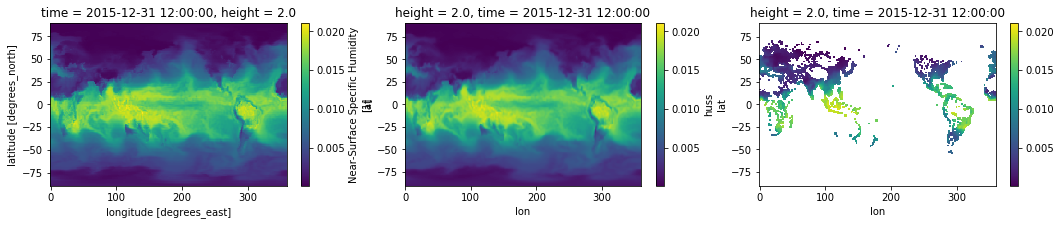

It takes elapsed_time 0.7808353900909424 to plot the layer
It takes elapsed_time 20.52569079399109 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/MIROC5/tas_day_MIROC5_rcp85_r1i1p1_20060101-20091231.nc
/glade/scratch/zhonghua/CMIP5/MIROC5/tas_day_MIROC5_rcp85_r1i1p1_20100101-20191231.nc
It takes elapsed_time 2.256962299346924 to load the data
*********Start to merge*********
It takes elapsed_time 4.41424560546875 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.09537506103515625 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 12.15388035774231 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6773009300231934 to mask the layer
*********Start to plot the layer*********


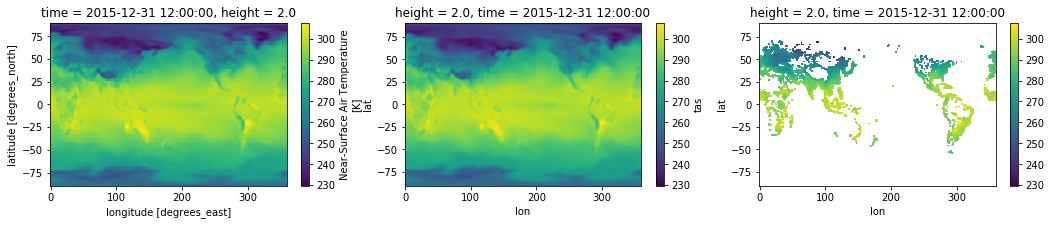

It takes elapsed_time 0.7715504169464111 to plot the layer
It takes elapsed_time 20.9809148311615 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/MIROC5/uas_day_MIROC5_rcp85_r1i1p1_20060101-20091231.nc
/glade/scratch/zhonghua/CMIP5/MIROC5/uas_day_MIROC5_rcp85_r1i1p1_20100101-20191231.nc
It takes elapsed_time 1.9932870864868164 to load the data
*********Start to merge*********
It takes elapsed_time 4.467929363250732 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.09547710418701172 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 12.120509624481201 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6714692115783691 to mask the layer
*********Start to plot the layer*********


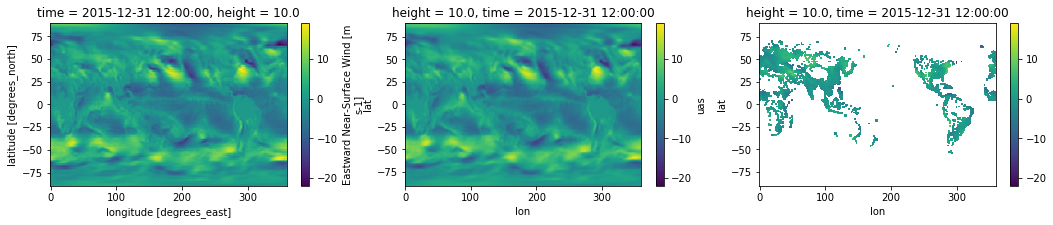

It takes elapsed_time 0.7557570934295654 to plot the layer
It takes elapsed_time 20.888503074645996 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/MIROC5/vas_day_MIROC5_rcp85_r1i1p1_20060101-20091231.nc
/glade/scratch/zhonghua/CMIP5/MIROC5/vas_day_MIROC5_rcp85_r1i1p1_20100101-20191231.nc
It takes elapsed_time 2.158536434173584 to load the data
*********Start to merge*********
It takes elapsed_time 4.540156602859497 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.10733890533447266 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 12.350411176681519 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.671445369720459 to mask the layer
*********Start to plot the layer*********


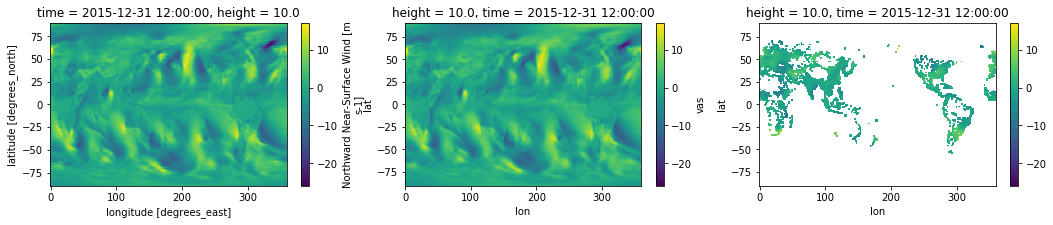

It takes elapsed_time 0.768049955368042 to plot the layer
It takes elapsed_time 21.206430912017822 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/MIROC5/pr_day_MIROC5_rcp85_r1i1p1_20060101-20091231.nc
/glade/scratch/zhonghua/CMIP5/MIROC5/pr_day_MIROC5_rcp85_r1i1p1_20100101-20191231.nc
It takes elapsed_time 2.1194026470184326 to load the data
*********Start to merge*********
It takes elapsed_time 4.508002996444702 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.0881357192993164 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 12.118463277816772 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6650331020355225 to mask the layer
*********Start to plot the layer*********


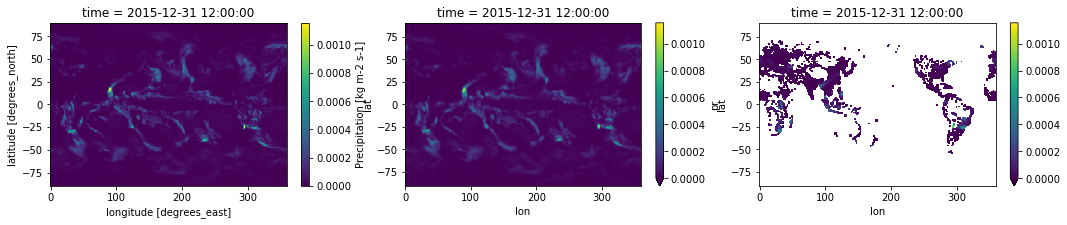

It takes elapsed_time 0.7262296676635742 to plot the layer
It takes elapsed_time 21.13570737838745 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/MIROC5/prsn_day_MIROC5_rcp85_r1i1p1_20060101-20091231.nc
/glade/scratch/zhonghua/CMIP5/MIROC5/prsn_day_MIROC5_rcp85_r1i1p1_20100101-20191231.nc
It takes elapsed_time 1.9407093524932861 to load the data
*********Start to merge*********
It takes elapsed_time 4.328897714614868 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.09949350357055664 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.7944016456604 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6651999950408936 to mask the layer
*********Start to plot the layer*********


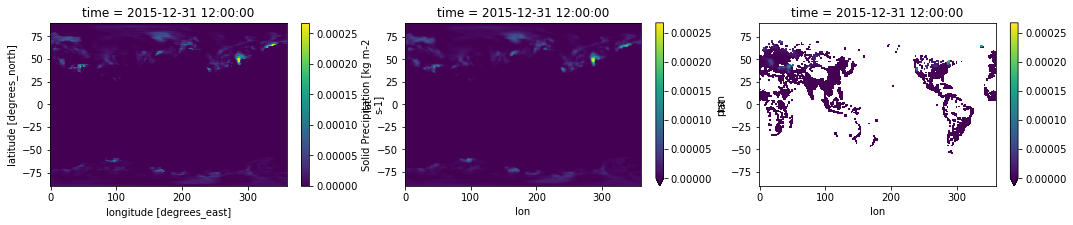

It takes elapsed_time 0.6726977825164795 to plot the layer
It takes elapsed_time 20.130037307739258 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/MIROC5/rlds_day_MIROC5_rcp85_r1i1p1_20060101-20091231.nc
/glade/scratch/zhonghua/CMIP5/MIROC5/rlds_day_MIROC5_rcp85_r1i1p1_20100101-20191231.nc
It takes elapsed_time 1.987318515777588 to load the data
*********Start to merge*********
It takes elapsed_time 4.337309837341309 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.08736634254455566 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.83163332939148 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6740491390228271 to mask the layer
*********Start to plot the layer*********


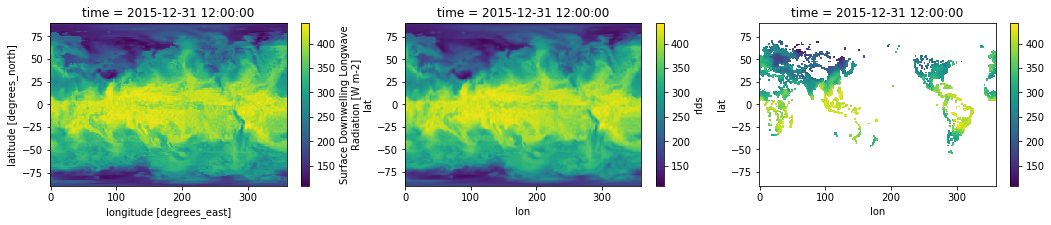

It takes elapsed_time 0.7344009876251221 to plot the layer
It takes elapsed_time 20.520976543426514 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/MIROC5/rlus_day_MIROC5_rcp85_r1i1p1_20060101-20091231.nc
/glade/scratch/zhonghua/CMIP5/MIROC5/rlus_day_MIROC5_rcp85_r1i1p1_20100101-20191231.nc
It takes elapsed_time 1.4886455535888672 to load the data
*********Start to merge*********
It takes elapsed_time 4.866971492767334 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.10169339179992676 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.743777513504028 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6845433712005615 to mask the layer
*********Start to plot the layer*********


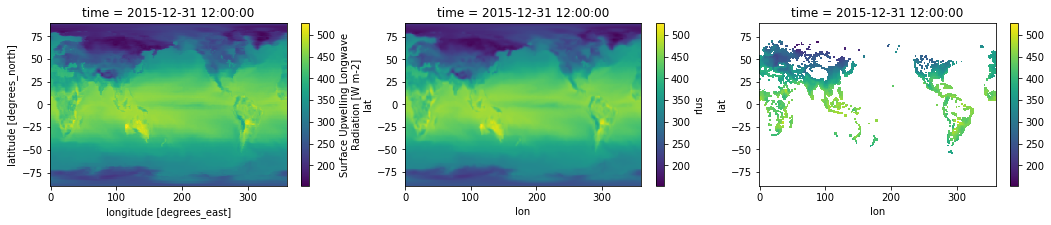

It takes elapsed_time 0.7427737712860107 to plot the layer
It takes elapsed_time 20.331680297851562 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/MIROC5/rsds_day_MIROC5_rcp85_r1i1p1_20060101-20091231.nc
/glade/scratch/zhonghua/CMIP5/MIROC5/rsds_day_MIROC5_rcp85_r1i1p1_20100101-20191231.nc
It takes elapsed_time 1.800497055053711 to load the data
*********Start to merge*********
It takes elapsed_time 4.227627992630005 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.028865575790405273 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.845676183700562 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6667931079864502 to mask the layer
*********Start to plot the layer*********


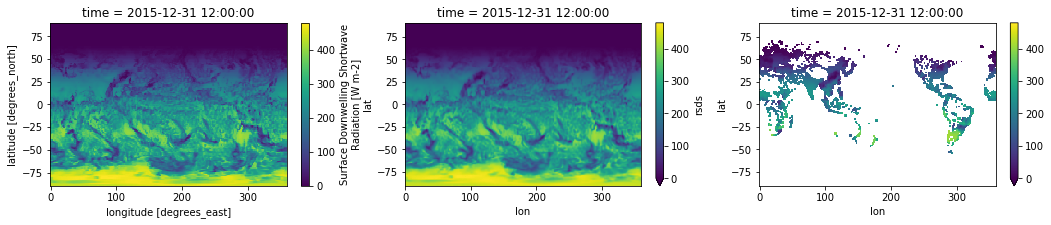

It takes elapsed_time 0.7146008014678955 to plot the layer
It takes elapsed_time 20.058605194091797 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/MIROC5/rsus_day_MIROC5_rcp85_r1i1p1_20060101-20091231.nc
/glade/scratch/zhonghua/CMIP5/MIROC5/rsus_day_MIROC5_rcp85_r1i1p1_20100101-20191231.nc
It takes elapsed_time 1.2978191375732422 to load the data
*********Start to merge*********
It takes elapsed_time 4.544698476791382 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.030611276626586914 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.918462753295898 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6677401065826416 to mask the layer
*********Start to plot the layer*********


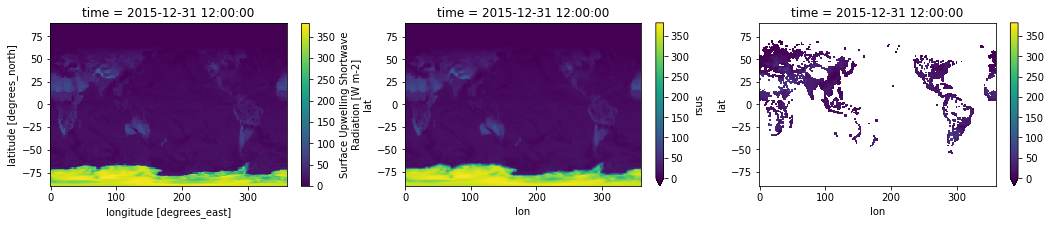

It takes elapsed_time 0.7304306030273438 to plot the layer
It takes elapsed_time 20.20202946662903 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2010, 2020, 10)

In [ ]:
df = get_urban_df(ds)

It takes elapsed_time 34.21523880958557 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

252.04178857803345


# Step 3: 2061-2070 

In [ ]:
del ds, df
gc.collect()

0

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/MIROC5/huss_day_MIROC5_rcp85_r1i1p1_20600101-20691231.nc
It takes elapsed_time 1.836106538772583 to load the data
/glade/scratch/zhonghua/CMIP5/MIROC5/huss_day_MIROC5_rcp85_r1i1p1_20700101-20791231.nc
It takes elapsed_time 3.959308385848999 to load the data
*********Start to merge*********
It takes elapsed_time 5.792593955993652 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.08065176010131836 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.770793437957764 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6529066562652588 to mask the layer
*********Start to plot the layer*********


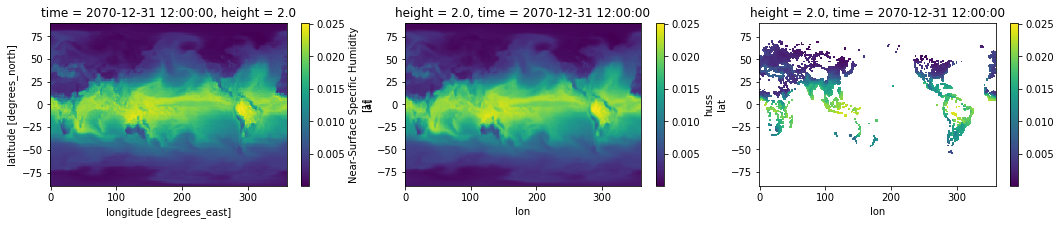

It takes elapsed_time 0.7364916801452637 to plot the layer
It takes elapsed_time 22.993760347366333 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/MIROC5/tas_day_MIROC5_rcp85_r1i1p1_20600101-20691231.nc
It takes elapsed_time 1.5445256233215332 to load the data
/glade/scratch/zhonghua/CMIP5/MIROC5/tas_day_MIROC5_rcp85_r1i1p1_20700101-20791231.nc
It takes elapsed_time 3.256834030151367 to load the data
*********Start to merge*********
It takes elapsed_time 5.895938158035278 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.08452272415161133 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.695050239562988 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6528511047363281 to mask the layer
*********Start to plot the layer*********


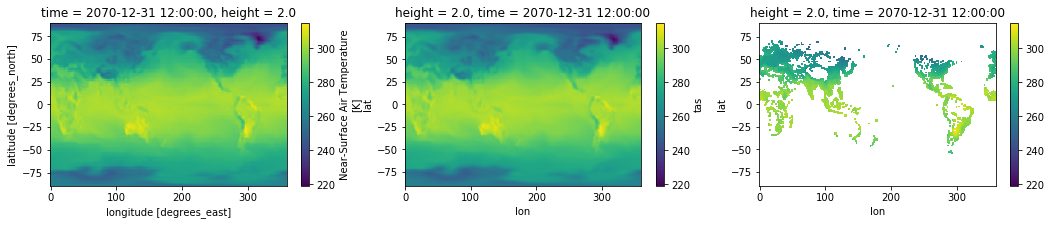

It takes elapsed_time 0.6909334659576416 to plot the layer
It takes elapsed_time 22.27733278274536 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/MIROC5/uas_day_MIROC5_rcp85_r1i1p1_20600101-20691231.nc
It takes elapsed_time 1.475104570388794 to load the data
/glade/scratch/zhonghua/CMIP5/MIROC5/uas_day_MIROC5_rcp85_r1i1p1_20700101-20791231.nc
It takes elapsed_time 3.1932573318481445 to load the data
*********Start to merge*********
It takes elapsed_time 5.639134883880615 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.11466598510742188 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.685923337936401 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6665313243865967 to mask the layer
*********Start to plot the layer*********


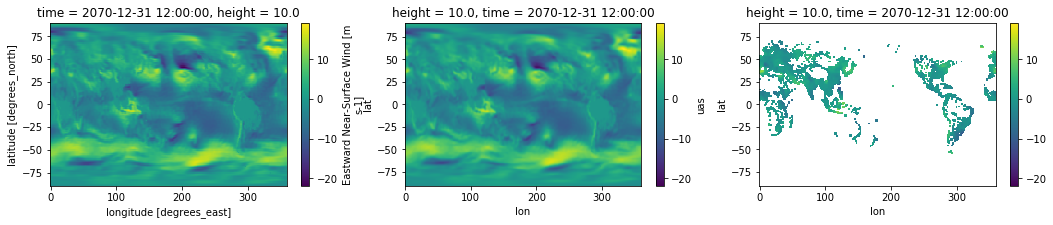

It takes elapsed_time 0.7031035423278809 to plot the layer
It takes elapsed_time 22.003576040267944 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/MIROC5/vas_day_MIROC5_rcp85_r1i1p1_20600101-20691231.nc
It takes elapsed_time 1.5954346656799316 to load the data
/glade/scratch/zhonghua/CMIP5/MIROC5/vas_day_MIROC5_rcp85_r1i1p1_20700101-20791231.nc
It takes elapsed_time 3.162233591079712 to load the data
*********Start to merge*********
It takes elapsed_time 5.805971384048462 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.08772611618041992 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.670101404190063 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.65159010887146 to mask the layer
*********Start to plot the layer*********


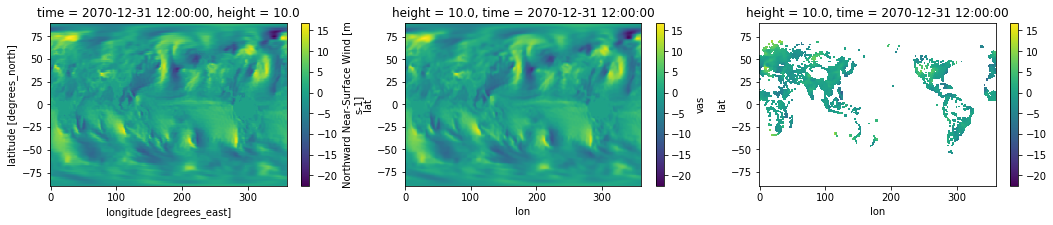

It takes elapsed_time 0.7331266403198242 to plot the layer
It takes elapsed_time 22.112574100494385 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/MIROC5/pr_day_MIROC5_rcp85_r1i1p1_20600101-20691231.nc
It takes elapsed_time 1.9693143367767334 to load the data
/glade/scratch/zhonghua/CMIP5/MIROC5/pr_day_MIROC5_rcp85_r1i1p1_20700101-20791231.nc
It takes elapsed_time 3.699946165084839 to load the data
*********Start to merge*********
It takes elapsed_time 5.70428466796875 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.03394794464111328 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.69143795967102 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6540918350219727 to mask the layer
*********Start to plot the layer*********


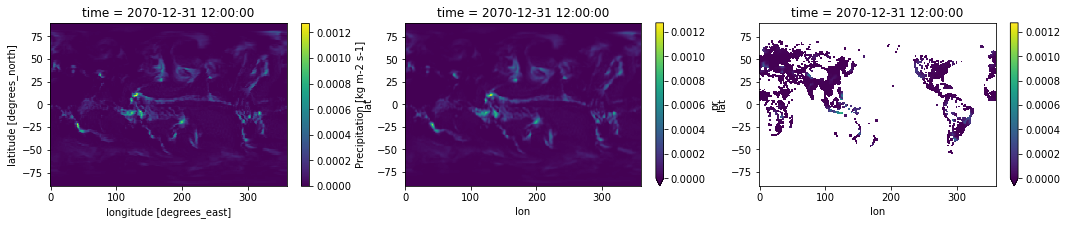

It takes elapsed_time 0.6935102939605713 to plot the layer
It takes elapsed_time 22.478978872299194 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/MIROC5/prsn_day_MIROC5_rcp85_r1i1p1_20600101-20691231.nc
It takes elapsed_time 1.5439512729644775 to load the data
/glade/scratch/zhonghua/CMIP5/MIROC5/prsn_day_MIROC5_rcp85_r1i1p1_20700101-20791231.nc
It takes elapsed_time 3.533719539642334 to load the data
*********Start to merge*********
It takes elapsed_time 5.682493209838867 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.07085299491882324 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.72234559059143 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.655160665512085 to mask the layer
*********Start to plot the layer*********


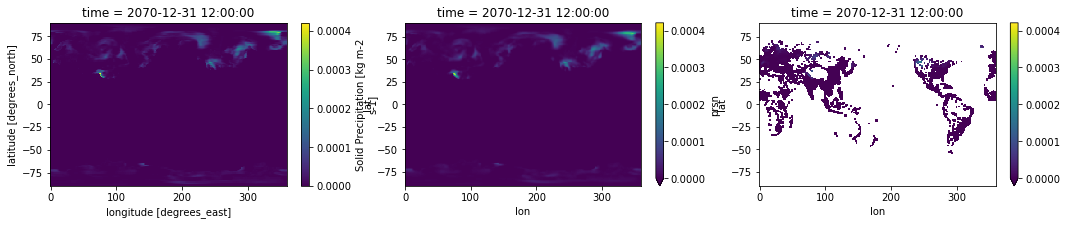

It takes elapsed_time 0.6647074222564697 to plot the layer
It takes elapsed_time 22.331717014312744 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/MIROC5/rlds_day_MIROC5_rcp85_r1i1p1_20600101-20691231.nc
It takes elapsed_time 1.7696771621704102 to load the data
/glade/scratch/zhonghua/CMIP5/MIROC5/rlds_day_MIROC5_rcp85_r1i1p1_20700101-20791231.nc
It takes elapsed_time 3.469174385070801 to load the data
*********Start to merge*********
It takes elapsed_time 5.66023325920105 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.030420780181884766 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.67991590499878 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6561794281005859 to mask the layer
*********Start to plot the layer*********


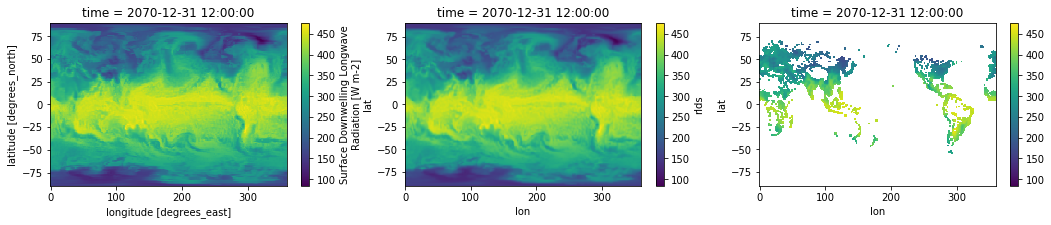

It takes elapsed_time 0.7368869781494141 to plot the layer
It takes elapsed_time 22.234498739242554 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/MIROC5/rlus_day_MIROC5_rcp85_r1i1p1_20600101-20691231.nc
It takes elapsed_time 1.4726636409759521 to load the data
/glade/scratch/zhonghua/CMIP5/MIROC5/rlus_day_MIROC5_rcp85_r1i1p1_20700101-20791231.nc
It takes elapsed_time 3.0099823474884033 to load the data
*********Start to merge*********
It takes elapsed_time 5.713042259216309 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.08713054656982422 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.677561044692993 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6552846431732178 to mask the layer
*********Start to plot the layer*********


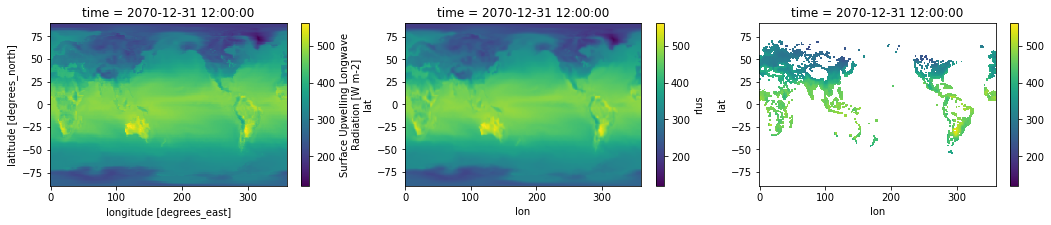

It takes elapsed_time 0.685868501663208 to plot the layer
It takes elapsed_time 21.831160068511963 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/MIROC5/rsds_day_MIROC5_rcp85_r1i1p1_20600101-20691231.nc
It takes elapsed_time 1.737372875213623 to load the data
/glade/scratch/zhonghua/CMIP5/MIROC5/rsds_day_MIROC5_rcp85_r1i1p1_20700101-20791231.nc
It takes elapsed_time 3.4152698516845703 to load the data
*********Start to merge*********
It takes elapsed_time 5.649561166763306 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.030004024505615234 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.68018388748169 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6561858654022217 to mask the layer
*********Start to plot the layer*********


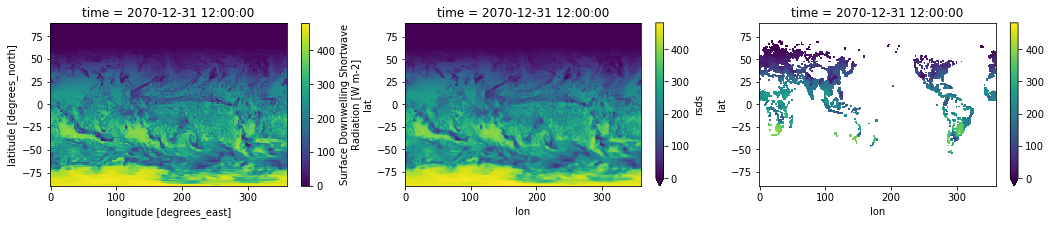

It takes elapsed_time 0.6942522525787354 to plot the layer
It takes elapsed_time 22.127925872802734 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/MIROC5/rsus_day_MIROC5_rcp85_r1i1p1_20600101-20691231.nc
It takes elapsed_time 1.706908941268921 to load the data
/glade/scratch/zhonghua/CMIP5/MIROC5/rsus_day_MIROC5_rcp85_r1i1p1_20700101-20791231.nc
It takes elapsed_time 3.1347975730895996 to load the data
*********Start to merge*********
It takes elapsed_time 5.633578538894653 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.030228376388549805 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.671090841293335 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6568529605865479 to mask the layer
*********Start to plot the layer*********


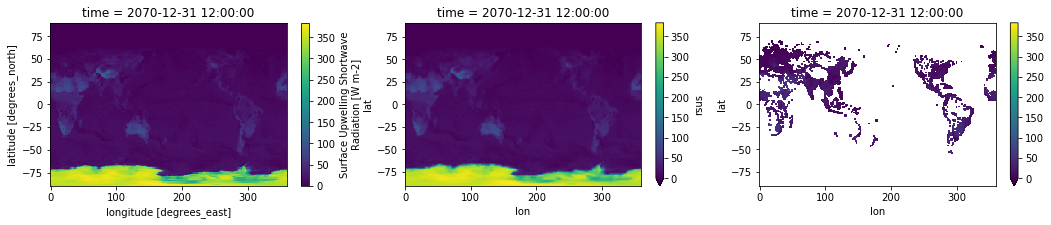

It takes elapsed_time 0.7117388248443604 to plot the layer
It takes elapsed_time 21.83989429473877 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2061(2060, 2080, 10)

In [5]:
df = get_urban_df(ds)

It takes elapsed_time 32.816444396972656 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

250.84787011146545
